# Let's explore an example of the pytorch end to end workflow.

In [ ]:
what_we_are_covering = { 1: "Preparation of data",
                        2: "build model" ,
                         3: "fitting the model to the data (training)",
                         4: "making prediction and evaluating the model",
                         5: "saving and loading the model",
                         6: "puttung all together"}

In [ ]:
import torch
from torch import nn #contains all of pytorch's building blocks for NN
import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.2.1+cu121'

1. Preparing data and loading it

Data can be almost everything in machine learning.

* excel speadsheet
*images of any kind
*videos
*audio
*DNA
*text

Machine learning is a game of two parts:
1. get data into a numerical representation
2. build a model to learn patterns in that numerical representation

To showcase this, let's create some known data using linear regression formula.
We use a linear regression formula to make a straight line with known parameters. Which is y = ax + b.

In [ ]:
# create known parameters
weight = 0.7   #it's b
bias = 0.3     # it's a

In [ ]:
# we want to build a model that is able to estimate this number weight and bias
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X + bias

In [ ]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

Splitting data into training and test sets

In [ ]:
#create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Let's visualize better the data

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  """
  Plots training data, test data and compares predictions.

  """
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data,train_labels, c="b", s=4, label="Training data")

  #plot test data in green
  plt.scatter(test_data,test_labels, c="g", s=4, label="Testing data")

  #are there predictions?
  if predictions is not None:
    #plot the prediction if they exist
    plt.scatter(test_data, predictions)  #we compare our predictions compared to the actual data

  #show legend
  plt.legend(prop={"size":14});

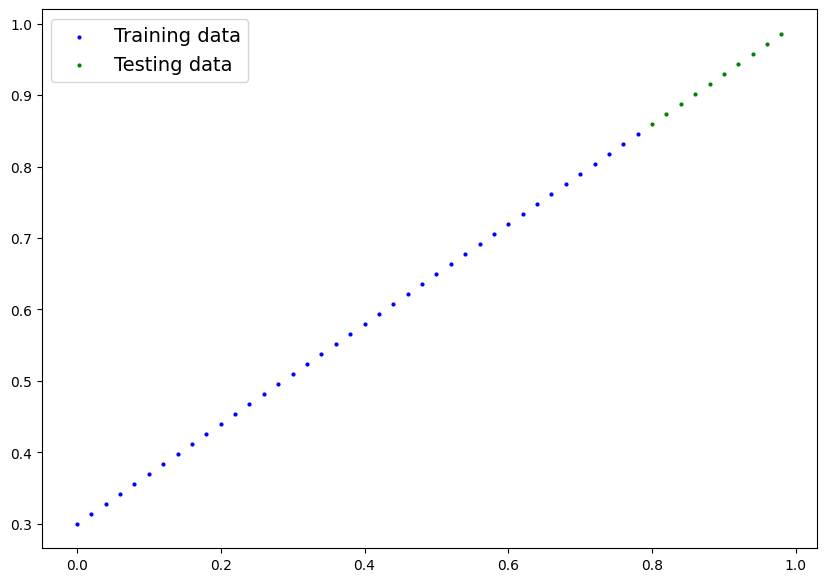

In [ ]:
plot_predictions()

In [ ]:
# what we want to do is build a model that can recognize the pattern in the blue dot so that when given the green dot it can give us the correct y

2.

```
# Questo è formattato come codice
```

Creating the model

1. the model starts with random values (weight and bias)
2. looks at training data and adjust the random values to better represent (or get closer) to the ideal values (the weight and bias we used to create the data)

It does that through two main algorithms:
* GD
* Back propagation

In [ ]:
 # we are going to create a linear regression model class
class LinearRegressionModel(nn.Module): #<- almost everything inherits from nn.Module
  def __init__(self):
      super().__init__()
      #now we want random numbers, update them to represent the pattern of the graph
      self.weights = nn.Parameter(torch.rand(1,
                                             requires_grad=True,
                                             dtype=torch.float)) #we have the requires gradient with true by default
      self.bias = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))

      #forward method to define the computation in the model
      #this function will try to make the random numbers close to the known ones through gradient descent
      #defines the operation that the model has to perform, in this case it's the linear regression formula
  def forward(self, x:torch.Tensor) -> torch.Tensor: # <- x is the input data
      return self.weights * x +self.bias #this is the linear regression formula

### Pytorch model building essentials

* torch.nn - contains all the building blocks for ocmputational graphs (like a neural network)
* torch.nn.Parameters - what parameters our model try and learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all the NN modules, if you subclass it, you should overwrite forward()
*torch.optim - this is where the optimizers in pytorch lives, will help with gradient descent
*def forward() - all nn.Module subclasses require you to overwrite forward() this method defines what happens in the forward computation

In [ ]:
#Check the content of our pytorch model
#we have created a model, let's see what is inside
#we can check our model parameters or what's inside our model using .parameters()

In [ ]:
#Create a random seed, so that the random vallues will be the same
torch.manual_seed(42)

#create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [ ]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [ ]:
#we want to get the values close to this ones
#notice in any cases you don't know the values you want
weight, bias

(0.7, 0.3)

###Making prediction using torch.inference_mode()

To check our model's predictive power, let's see how well it predicts y_test based on x_test.

When we pass data through our model it's going to run it trough the forward module



In [ ]:
#make prediction with model

with torch.inference_mode():  #use it to have faster prediction, it keeps less data, another way is to use torch.n_grad()
  y_preds = model_0(X_test)

y_preds

tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

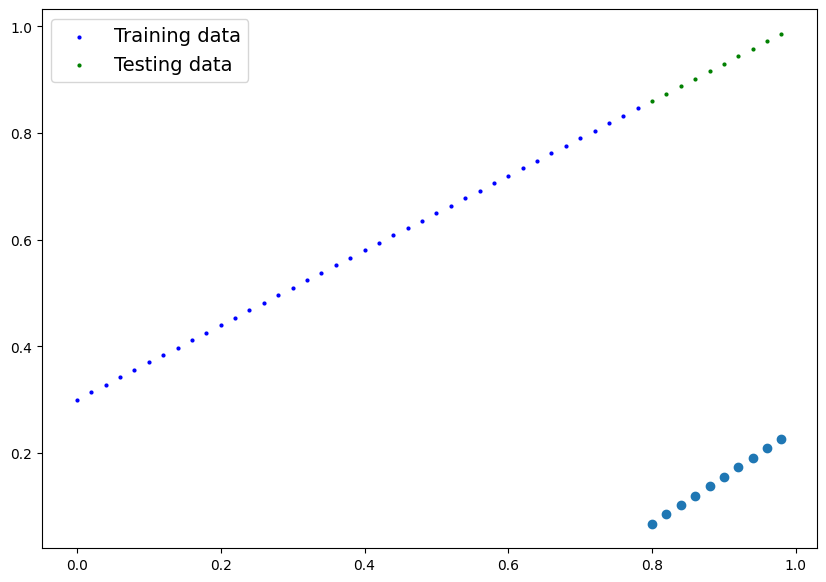

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#We see that our prediction is extrimely far from the optimal prediction.

In [ ]:
nums = [1,2,3]
it = iter(nums) #convert it into an iterator
print(it)

## 2.Train model
The whole idea of training is for the model to move from some *unknown parameters (these may be random) to some known parameters. Or in other words from a poor representationof the data to a better representati on of the data.

To understand how poorly the data is represented we use the so called *LOSS FUNCTION*.
The loss function may also be called cost function or criterion in different areas. For our case we use loss function.

**Loss function**: a function to measure how wrong our  model predictions are to the ideal output. Lower is better.

Things we need to train:
1. Loss function
2. Optimizer -> takes into account the loss of a model and adjust the model's parameters, ex. weight and bias, to improve the loss function.
And specifically for pytorch we need:
*a training loop
*a testing loop

In [ ]:
#Setup a loss function
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

In [ ]:
#set up a optimizer
#the smaller the lr the small the change in the parameter
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) #lr=learning rate, most important hyperparameter, we can set it

# Buildin a training and testing loop in Pytorch

We need a couple of things for the training loop:
0. loop through the data
1. forward pass (this involves data moving trough our model's forward() function) to make prediciton on data - also called forward propagation
2. calculate loss (compare forward pass predictions to ground truth labels)
3. optimize zero grad
4. loss backward - move backward through the network to compute the gradient of each of the parameters of our mofel with respect to the loss
5. optimizer step - adjust the parameters to reduce the loss

In [ ]:
#Building a training loop

#an epoch is one loop through the data
epochs = 200

#tracking different values
epoch_count=[]
loss_values= []
test_loss_values = []

###TRAINING - is where the model learns patterns on the training data
#0. loop throught the data
for epoch in range(epochs): #we pass the data through the model for a number of epochs (it's an hyperparameter because we decide it)
  #set the model to training mode
  model_0.train() #in pytorch sets all parameters that require gradients to require gradient

  #1. forward pass
  y_pred = model_0(X_train)

  #2.Calculate the loss
  loss = loss_fn (y_pred, y_train) #how far our prediction is from the actual labels
  #print(f"The loss is: {loss}")
  # 3.Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer (performs gradient descent)
  optimizer.step()  #makes calculation on  how the parameters should be changed
  #by default the optimizer changes will accumulate through the loop so we have to zero them above in step 3

  ###TESTING - where we evaluate the patterns/parameters that the model has learned on unseen data
  model_0.eval() #turns off  settings not needed for evaluation
  with torch.inference_mode(): #turns off gradient tracking and other things
   #1.Do forward pass
   test_pred = model_0(X_test)

   #2. Calulate the loss
   test_loss = loss_fn(test_pred, y_test)

   if epoch %10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test loss is: {test_loss}")

   #3. Print out model state_dict() to see what's happening
   print(model_0.state_dict())











Epoch: 0 | Test loss is: 0.7624635696411133
OrderedDict([('weights', tensor([0.8862])), ('bias', tensor([-0.6282]))])
OrderedDict([('weights', tensor([0.8901])), ('bias', tensor([-0.6182]))])
OrderedDict([('weights', tensor([0.8940])), ('bias', tensor([-0.6082]))])
OrderedDict([('weights', tensor([0.8979])), ('bias', tensor([-0.5982]))])
OrderedDict([('weights', tensor([0.9018])), ('bias', tensor([-0.5882]))])
OrderedDict([('weights', tensor([0.9057])), ('bias', tensor([-0.5782]))])
OrderedDict([('weights', tensor([0.9096])), ('bias', tensor([-0.5682]))])
OrderedDict([('weights', tensor([0.9135])), ('bias', tensor([-0.5582]))])
OrderedDict([('weights', tensor([0.9174])), ('bias', tensor([-0.5482]))])
OrderedDict([('weights', tensor([0.9213])), ('bias', tensor([-0.5382]))])
Epoch: 10 | Test loss is: 0.6277537941932678
OrderedDict([('weights', tensor([0.9252])), ('bias', tensor([-0.5282]))])
OrderedDict([('weights', tensor([0.9291])), ('bias', tensor([-0.5182]))])
OrderedDict([('weights'

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.9462])), ('bias', tensor([0.1963]))])

In [ ]:
weight, bias

(0.7, 0.3)

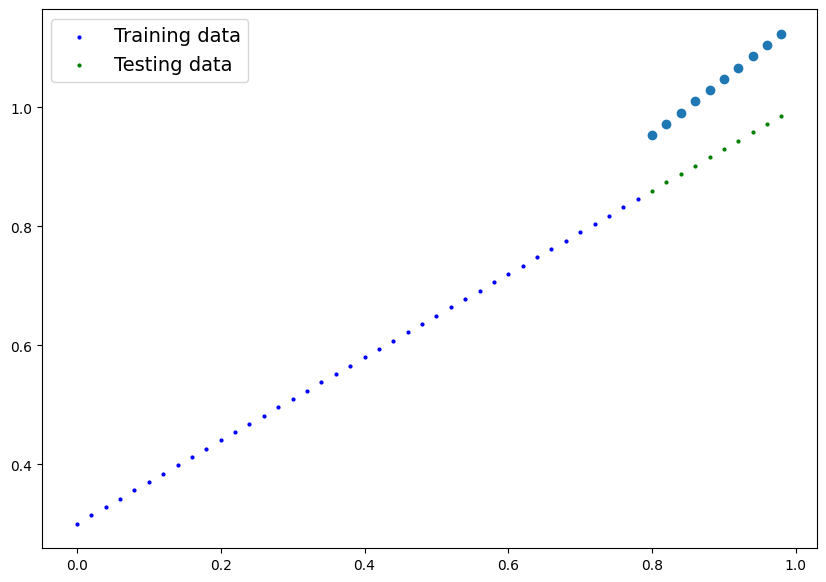

In [ ]:
#Let's see how close we are now:
with torch.inference_mode():
  y_pred_new = model_0(X_test)
plot_predictions(predictions=y_pred_new)
#this is the output after training for a lot of epochs

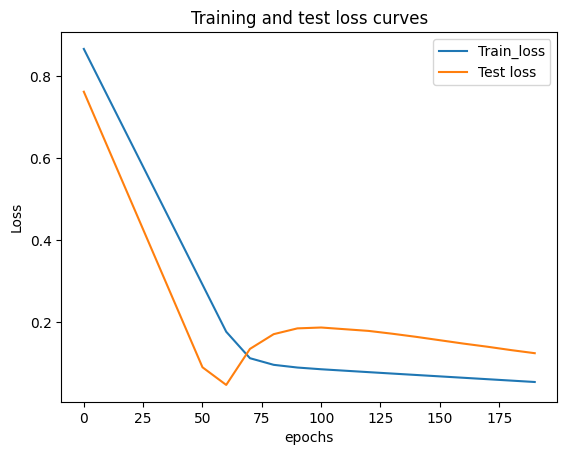

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train_loss")
plt.plot(epoch_count,test_loss_values, label= "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend();

# Saving a model in pytorch
there are 3 main methods for saving and loading m odels in pytorch.
1. torch.save() - allows to save a pytorch object in pyton pickle format
2. torch.load() - allow to load a saved pytorch objject
3. torch.nn.Module.load_state_dict() - allows to load a model's saved state dictionary

In [ ]:
#saving our pytorch model
from pathlib import Path

#1. create a  model directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. create a model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#we just have the path where we want our model to be

PosixPath('Models/01_pytorch_workflow_model_0.pth')

In [ ]:
#3.save the model dict
print(f"Saving our model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_0.state_dict(), f= MODEL_SAVE_PATH)

Saving our model to: Models/01_pytorch_workflow_model_0.pth


In [ ]:
ls -l Models/

total 4
-rw-r--r-- 1 root root 1680 Apr 13 14:07 01_pytorch_workflow_model_0.pth


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.9462])), ('bias', tensor([0.1963]))])

In [ ]:
#Loading a pytorch model
#since we state our model's state dict rather then the new model we create a new instance
# of the model class and load the saved stte_dict into that

#Instantiate a new instance of the class
loaded_model_0= LinearRegressionModel()

#load the save state_dict() of model_0, this will update the new instace with updates parameters
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.9462])), ('bias', tensor([0.1963]))])

In [ ]:
#make some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds



tensor([[0.9533],
        [0.9723],
        [0.9912],
        [1.0101],
        [1.0290],
        [1.0480],
        [1.0669],
        [1.0858],
        [1.1047],
        [1.1237]])

In [ ]:
#make some prediction with our model_0
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.9533],
        [0.9723],
        [0.9912],
        [1.0101],
        [1.0290],
        [1.0480],
        [1.0669],
        [1.0858],
        [1.1047],
        [1.1237]])

In [ ]:
y_preds==loaded_model_preds #check if they are the same predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Putting all together

Do everything in one place

In [ ]:
#IMPORTING THE NEEDED LIBRARY
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
#create a device-agnostic code -> if there is a gpu available the code will use it (for potentially faster computing)
device = "cuda" if torch.cuda.is_available() else "cpu"
print("we are running on device:", device)

we are running on device: cpu


In [ ]:
# DATASET
#we create some data by using the linear regression formula

weight = 0.7
bias = 0.3

#we want to create a model that is able to predict this values

start = 0
end = 1
step = 0.02

#we have the data
X = torch.arange(start,end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
#we split the data into training and testing data, we use 80% and 20%
train_split = int(0.8 * len(X))
X_train, y_train = X[: train_split], y[: train_split]
X_test, y_test =   X[train_split :], y[train_split:]


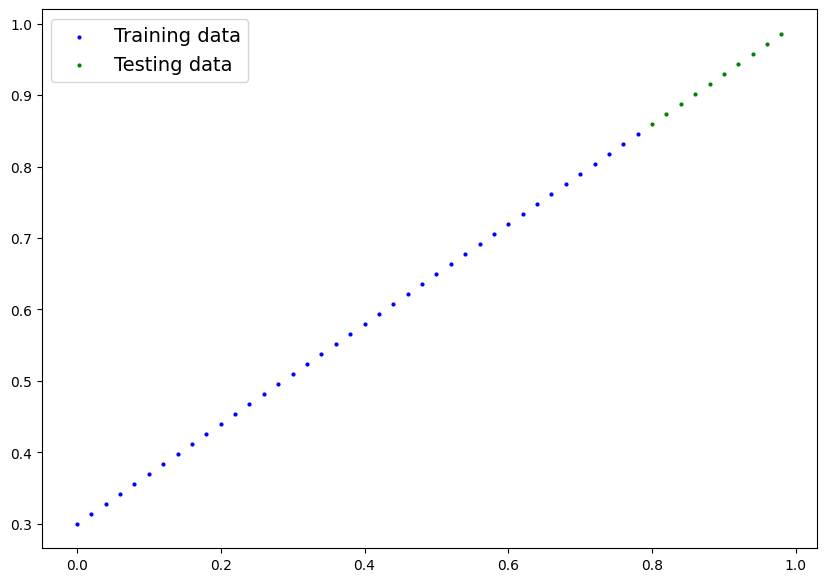

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
#Building the pytorch linear model

class LinearRegressionModelV2(nn.Module):

  def __init__(self):
    super().__init__()
    #instead of defining ourselves the two parameters weight and bias, we can use the linear layer of the nn
    #we use the nn.Linear() to create the model parameters
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1) #this numbers depends on th data we are working with, in this case we are taken an  x in input and we want a y in output
    #the nn.Liear will apply a linear transformation meaning y= w*X +b

  def forward(self, X: torch.Tensor)  -> torch.Tensor:
    return self.linear_layer(X)


#set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#training the model
#we need: a loss function, an optimizer, a training loop, a testing loop

loss_function = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(),lr = 0.01)

In [ ]:
#training loop

torch.manual_seed(42)

epochs = 200

for epoch in range(epochs):
  model_1.train()

  #1. forward pass
  y_pred = model_1(X_train)

  #2.loss function
  loss = loss_fn(y_pred, y_train)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. perform backpropagation
  loss.backward()

  #5. optimizer.step()
  optimizer.step()


  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  #print things out

  if epoch %10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | test loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | test loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | test loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | test loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | test loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | test loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | test loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | test loss: 0.013801807537674904
Epoch: 130 | Loss: 0.0012645035749301314 | test loss: 0.01380180753767

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

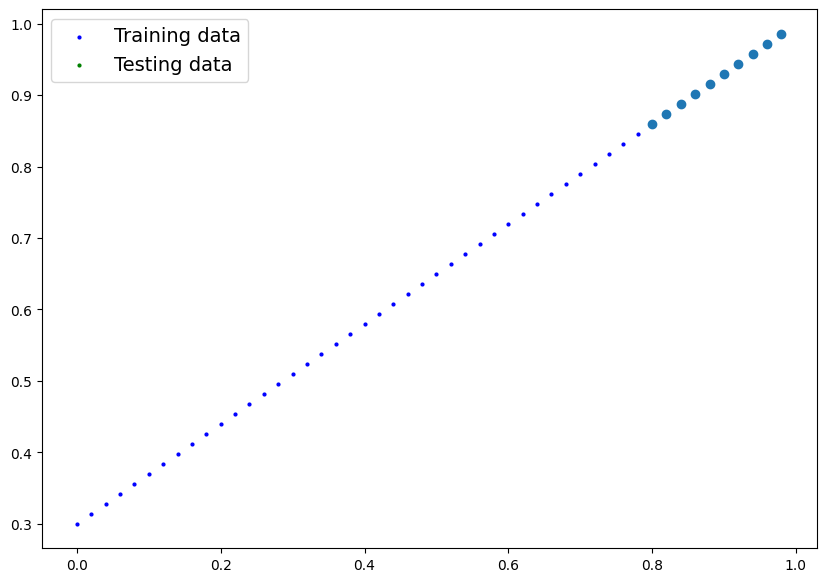

In [ ]:
plot_predictions( predictions=test_pred)

In [ ]:
#saving and loading a pytorch model

from pathlib import Path

#create a model director
#MODEL_PATH = Path("Models")
#MODEL_PATH.mkdir(parets=True, exist_ok = True)

MODEL_NAME= "01_MODEL_1"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME



#LOADING THE MODEL
new_model = LinearRegressionModelV2()
new_model.load_state_dict((torch.load(f=MODEL_SAVE_PATH)))